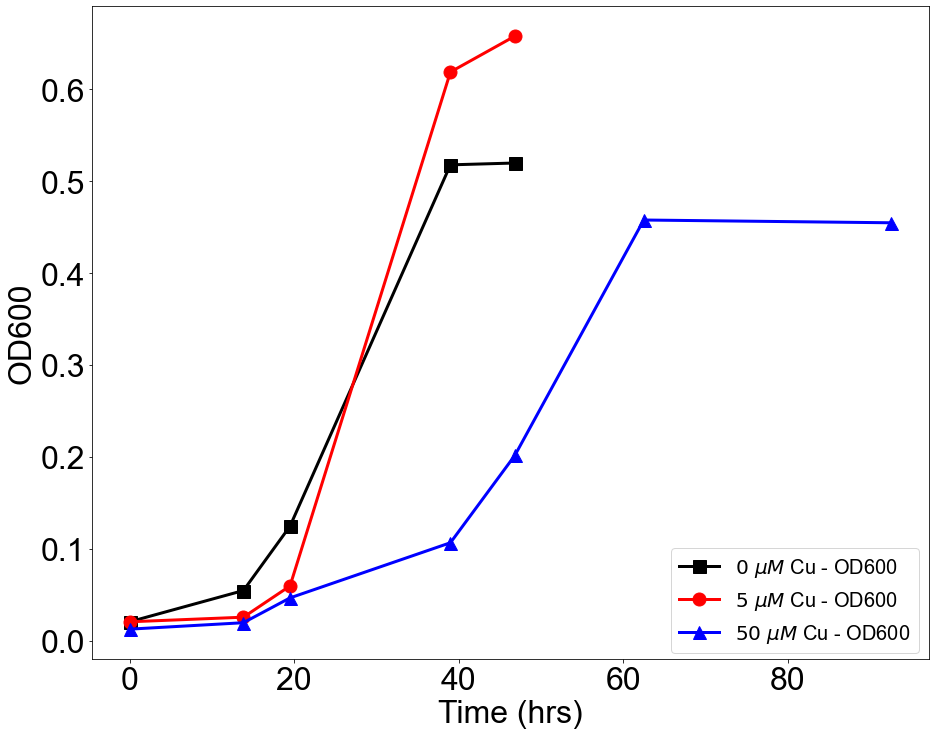

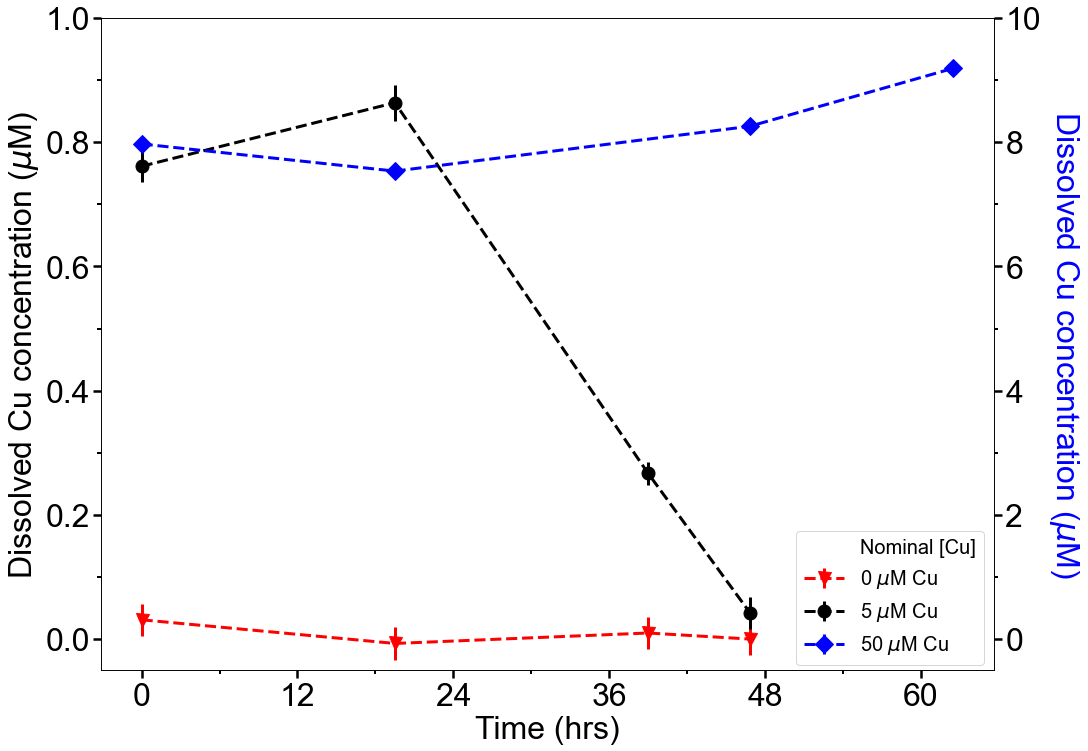

[ 0.         13.83333333 19.5        39.         46.83333333 62.5
 92.5       ]


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

#Close any open figure windows
plt.close('all') 

#Set font
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams['font.sans-serif'] = ['Arial']

#Dictionary for plot series
plotseries = {}

#Define PATH of input data excel file (formatted as described above) 
# Read OD and Cu concentration data
od600_rawdata = r"06_10_22_copper and OD.xlsx"
def gettime(filepath):      #import timestamps from excel sheet
    growthdf = pd.read_excel(
        filepath,           #file path to import
        sheet_name='OD600s',
        header=0          #which row has header names for data frame
        )
    elapse_time = [0] # create a list to store the elapse time
    for i in range (len(growthdf['Time/Sample'])-1):
        elapse_time.append((growthdf['Time/Sample'][i+1]-growthdf['Time/Sample'][0])/pd.to_timedelta(1, unit='hr')) 
        # Covert the time difference to hrs, and output an ARRAY
    elapse_time=np.array(elapse_time)
    return elapse_time
Time = gettime(od600_rawdata)
OD=pd.read_excel(od600_rawdata,sheet_name='OD600s', header=0)
Cu=pd.read_excel(od600_rawdata,sheet_name='Plot', header=0)
OD_0=OD['0uM'].to_numpy()
OD_5=OD['5uM'].to_numpy()
OD_50=OD['50uM'].to_numpy()
Cu_0=Cu['0uM'].to_numpy()
Cu_5=Cu['5uM'].to_numpy()
Cu_50=Cu['50uM'].to_numpy()
Cu_0_se=Cu['0_se'].to_numpy()
Cu_5_se=Cu['5_se'].to_numpy()
Cu_50_se=Cu['50_se'].to_numpy()
# Make the plots
# Mask nan in Cu
Cu_0_mask=np.isfinite(Cu_0)
Cu_5_mask=np.isfinite(Cu_5)
Cu_50_mask=np.isfinite(Cu_50)
fig_Cu,ax_OD = plt.subplots(figsize=(15,12))
#ax_Cu=ax_OD.twinx()
fig_iCu,ax_Cu = plt.subplots(figsize=(16,12))
ax_OD.plot(Time, OD_0,'s-',color='black',label='$0 \\ \mu M$ Cu - OD600',linewidth=3, markersize=13)
ax_OD.plot(Time, OD_5,'o-',color='red',label='$5 \\ \mu M$ Cu - OD600',linewidth=3, markersize=13)
ax_OD.plot(Time, OD_50,'^-',color='blue',label='$50 \\ \mu M$ Cu - OD600',linewidth=3, markersize=13)
ax_Cu.plot([],[],' ', label='Nominal [Cu]')
ax_Cu.errorbar(Time[Cu_0_mask], Cu_0[Cu_0_mask],yerr=Cu_0_se[Cu_0_mask], fmt='v--', color='red',
           label='0 $\mu$M Cu',linewidth=3, markersize=13)
ax_Cu.errorbar(Time[Cu_5_mask], Cu_5[Cu_5_mask],yerr=Cu_5_se[Cu_5_mask], fmt='o--',color='black',
           label='5 $\mu$M Cu',linewidth=3, markersize=13)
ax_50=ax_Cu.twinx()
ax_50.errorbar(Time[Cu_50_mask], Cu_50[Cu_50_mask],yerr=Cu_50_se[Cu_50_mask], fmt='D--',color='blue',
           label='50 $\mu$M Cu',linewidth=3, markersize=13)
# ax_Cu.set_yscale('log')
ax_OD.set_xlabel('Time (hrs)', fontsize=32)
ax_OD.set_ylabel('OD600', fontsize=32)
ax_Cu.set_ylabel('Dissolved Cu concentration ($\mu$M)', fontsize = 32)
ax_50.set_ylabel('Dissolved Cu concentration ($\mu$M)', color='blue',fontsize = 32, rotation=270, labelpad=40)
ax_Cu.set_xlabel('Time (hrs)', fontsize=32)
ax_OD.tick_params(labelsize=32)
ax_Cu.tick_params(labelsize=32)
ax_Cu.tick_params(which='major',direction='out', length=8, width=2.5, labelsize=32)
ax_Cu.tick_params(which='minor',direction='out', length=4, width=2.0, labelsize=32)
ax_50.tick_params(which='major',direction='out', length=8, width=2.5, labelsize=32)
ax_50.tick_params(which='minor',direction='out', length=4, width=2.0, labelsize=32)
ax_Cu.yaxis.set_minor_locator(ticker.MultipleLocator(0.1))
ax_50.yaxis.set_minor_locator(ticker.MultipleLocator(1))
ax_Cu.xaxis.set_major_locator(ticker.MultipleLocator(12))
ax_Cu.xaxis.set_minor_locator(ticker.MultipleLocator(6))
ax_Cu.set_ylim([-0.05,1.0])
ax_50.set_ylim([-0.5,10])
#plt.title('M. capsulatus Growth Curves and Cu concentrations', fontsize=30)
fig_Cu.legend(bbox_to_anchor=(0.9, 0.12), loc='lower right', fontsize=20)
fig_iCu.legend(bbox_to_anchor=(0.9, 0.12), loc='lower right', fontsize=20)
fig_iCu.savefig('Cu.pdf',bbox_inches='tight')
fig_iCu.savefig('Cu.png',bbox_inches='tight')
plt.show()
print(Time)